In [1]:
# раскоммитить при первичном запуске кода

#!pip install parquet
#!pip install --upgrade mplfinance
#!pip install pyodbc

import parquet
import json
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import os
import pyodbc
import numpy as np

In [2]:
class DB:
    
    def __init__(self, server, database, username, password):
        self.server = server
        self.database = database
        self.username = username
        self.password = password
        
    def get_connection(self):
        return pyodbc.connect('DRIVER={SQL Server};SERVER='+self.server+';\
                                      DATABASE='+self.database+';UID='+self.username+';\
                                      PWD='+self.password)
    
    def read_sql(QUERY, object):
        return pd.read_sql(QUERY, object.get_connection())
    
class Rates:
    
    def get_listdir(path_dir):
        return os.listdir(path_dir)
    
    def read_parquet(path_rates):
        return pd.read_parquet(path_rates)
    
class Dataframe:
    
    def con_to_datetime(timestamp):
        return pd.to_datetime(timestamp)
    
    def test_company(DataFrame):
        return 'Big' if Dataframe == "B" else 'Small'    

In [7]:
# Указываем путь к директории и получаем список файлов

PATH_DIR = r"C:\Users\Dmitry\Desktop\percentage from [95; 200]"
QUERY = 'select ipoe.Id, ipoe.ListingAt, ipoe.CompanyName, ipoe.Ticker, c.Name as Country, c.Code as CountryCode, c.Currency as Currency, e.Name as Exchange, ipoe.IPOValue_Value, ipoe.IPOValue_Postfix, ipoe.IPOPrice_Value, ipoe.IPOPrice_Postfix from  IPOEvents as ipoe inner join Countries as c on c.Id = ipoe.CountryId inner join Exchanges as e on e.Id = ipoe.ExchangeId order by ListingAt;'

files = Rates.get_listdir(PATH_DIR)
 
# Выводим список файлов

files_list = [x.replace('.parquet', '') for x in files]
print(files_list)

['A', 'ABCL', 'ABNB', 'ACI', 'ACN', 'ADT', 'AEO', 'AFRM', 'AGNC', 'AKAM', 'ALLY', 'AMD', 'AMT', 'AMWL', 'AMX', 'AR', 'ARMK', 'ASAN', 'ATUS', 'AUR', 'AVDX', 'AXTA', 'AZEK', 'BABA', 'BDX', 'BEKE', 'BIDU', 'BILI', 'BILL', 'BJ', 'BMBL', 'BNGO', 'BNTX', 'BROS', 'BWA', 'BX', 'BYND', 'BYON', 'CAG', 'CAN', 'CAVA', 'CBRE', 'CCI', 'CCTG', 'CF', 'CFG', 'CFLT', 'CHK', 'CHWY', 'CLF', 'CME', 'CNX', 'COMM', 'COMP', 'COTY', 'CPNG', 'CPRI', 'CRM', 'CROX', 'CRWD', 'CSX', 'CTSH', 'CVS', 'CX', 'CYH', 'DADA', 'DAL', 'DASH', 'DBI', 'DDOG', 'DG', 'DKS', 'DNA', 'DOCN', 'DOCS', 'DOCU', 'EBAY', 'ECL', 'ELAN', 'EMN', 'EPD', 'EQH', 'ERX', 'ET', 'EXC', 'EXPE', 'FANG', 'FDX', 'FIGS', 'FLNC', 'FOX', 'FSLR', 'FSLY', 'FTI', 'FTNT', 'GDRX', 'GFS', 'GLBE', 'GLD', 'GM', 'GME', 'GNW', 'GOLD', 'GOOG', 'GOOGL', 'GOOS', 'GPRO', 'GRMN', 'GRPN', 'GS', 'GSK', 'GTLB', 'HAL', 'HCA', 'HCP', 'HIG', 'HLT', 'HMY', 'HOOD', 'HPE', 'HTZ', 'HUN', 'HUYA', 'INVH', 'IPG', 'IQ', 'JBLU', 'JD', 'JMIA', 'JNPR', 'JPM', 'KBR', 'KC', 'KMI', 'KSS',

In [37]:
len(files_list)

206

In [38]:
name_ticker = str(input("Введите название тикера: ")) 
PATH_RATES = f"C:/Users/Dmitry/Desktop/percentage from [95; 200]/{name_ticker}.parquet"
df_rates = Rates.read_parquet(PATH_RATES)

Введите название тикера: XP


In [39]:
df_rates.OpenTimestamp = Dataframe.con_to_datetime(df_rates.OpenTimestamp)
df_rates.CloseTimestamp = Dataframe.con_to_datetime(df_rates.CloseTimestamp)

# Окргуляет до микросекунд во фрейме

#df.OpenTimestamp = df.OpenTimestamp.round("ms")
#df.CloseTimestamp = df.CloseTimestamp.round("ms")
#df.CreatedAt = df.CreatedAt.round('ms')

df_rates

,OpenPrice,ClosePrice,High,Low,Volume,OpenTimestamp,CloseTimestamp,TickerId,CreatorId,GranularityType,CreatedAt,TickerSynchronizationId,TickerName
0,32.750000,32.609501,33.000000,32.500000,9002337.0,1970-01-01 00:26:16.082460,1970-01-01 00:26:16.022400,54479,1,1,2024-02-18 15:13:30.409016000,544781,XP/USD
1,32.560001,32.310001,32.669998,32.310001,557674.0,1970-01-01 00:26:16.082520,1970-01-01 00:26:16.022400,54479,1,1,2024-02-18 15:13:30.409016600,544781,XP/USD
2,32.310001,32.630001,32.689999,32.250000,554138.0,1970-01-01 00:26:16.082580,1970-01-01 00:26:16.022400,54479,1,1,2024-02-18 15:13:30.409017000,544781,XP/USD
3,32.630001,32.119999,32.830002,32.119999,981123.0,1970-01-01 00:26:16.082640,1970-01-01 00:26:16.022400,54479,1,1,2024-02-18 15:13:30.409017200,544781,XP/USD
4,32.119999,32.160000,32.380001,32.119999,473174.0,1970-01-01 00:26:16.082700,1970-01-01 00:26:16.022400,54479,1,1,2024-02-18 15:13:30.409017400,544781,XP/USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
396346,24.280001,24.290400,24.309999,24.275000,51005.0,1970-01-01 00:28:27.857820,1970-01-01 00:28:27.782400,54479,1,1,2024-02-18 15:13:30.505197800,544781,XP/USD
396347,24.290001,24.295000,24.299999,24.290001,36813.0,1970-01-01 00:28:27.857880,1970-01-01 00:28:27.782400,54479,1,1,2024-02-18 15:13:30.505198000,544781,XP/USD
396348,24.295000,24.299999,24.299999,24.290001,110784.0,1970-01-01 00:28:27.857940,1970-01-01 00:28:27.782400,54479,1,1,2024-02-18 15:13:30.505198200,544781,XP/USD
396349,24.290001,24.290001,24.290001,24.290001,34149.0,1970-01-01 00:28:27.858000,1970-01-01 00:28:27.782400,54479,1,1,2024-02-18 15:13:30.505198300,544781,XP/USD


In [40]:
df_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396351 entries, 0 to 396350
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   OpenPrice                396351 non-null  float32       
 1   ClosePrice               396351 non-null  float32       
 2   High                     396351 non-null  float32       
 3   Low                      396351 non-null  float32       
 4   Volume                   396351 non-null  float32       
 5   OpenTimestamp            396351 non-null  datetime64[ns]
 6   CloseTimestamp           396351 non-null  datetime64[ns]
 7   TickerId                 396351 non-null  int32         
 8   CreatorId                396351 non-null  int32         
 9   GranularityType          396351 non-null  int32         
 10  CreatedAt                396351 non-null  datetime64[ns]
 11  TickerSynchronizationId  396351 non-null  int32         
 12  TickerName      

In [41]:
# фрейм для первого графика (свечи)

df1 = df_rates.head(50)

# фрейм для второго графика (к свечам добавляются скользящие средние и график с Volume)

df2 = df_rates.head(100).set_index('CreatedAt')
df2 = df2.rename(columns = {"OpenPrice":"Open", "ClosePrice":"Close"})

In [42]:
df2

,Open,Close,High,Low,Volume,OpenTimestamp,CloseTimestamp,TickerId,CreatorId,GranularityType,TickerSynchronizationId,TickerName
CreatedAt,,,,,,,,,,,,
2024-02-18 15:13:30.409016000,32.750000,32.609501,33.000000,32.500000,9002337.0,1970-01-01 00:26:16.082460,1970-01-01 00:26:16.022400,54479,1,1,544781,XP/USD
2024-02-18 15:13:30.409016600,32.560001,32.310001,32.669998,32.310001,557674.0,1970-01-01 00:26:16.082520,1970-01-01 00:26:16.022400,54479,1,1,544781,XP/USD
2024-02-18 15:13:30.409017000,32.310001,32.630001,32.689999,32.250000,554138.0,1970-01-01 00:26:16.082580,1970-01-01 00:26:16.022400,54479,1,1,544781,XP/USD
2024-02-18 15:13:30.409017200,32.630001,32.119999,32.830002,32.119999,981123.0,1970-01-01 00:26:16.082640,1970-01-01 00:26:16.022400,54479,1,1,544781,XP/USD
2024-02-18 15:13:30.409017400,32.119999,32.160000,32.380001,32.119999,473174.0,1970-01-01 00:26:16.082700,1970-01-01 00:26:16.022400,54479,1,1,544781,XP/USD
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-18 15:13:30.409035800,34.255001,34.275002,34.279999,34.200001,39474.0,1970-01-01 00:26:16.088160,1970-01-01 00:26:16.022400,54479,1,1,544781,XP/USD
2024-02-18 15:13:30.409036400,34.279999,34.380001,34.380001,34.264999,33393.0,1970-01-01 00:26:16.088220,1970-01-01 00:26:16.022400,54479,1,1,544781,XP/USD
2024-02-18 15:13:30.409036500,34.369999,34.400101,34.480000,34.360001,39919.0,1970-01-01 00:26:16.088280,1970-01-01 00:26:16.022400,54479,1,1,544781,XP/USD


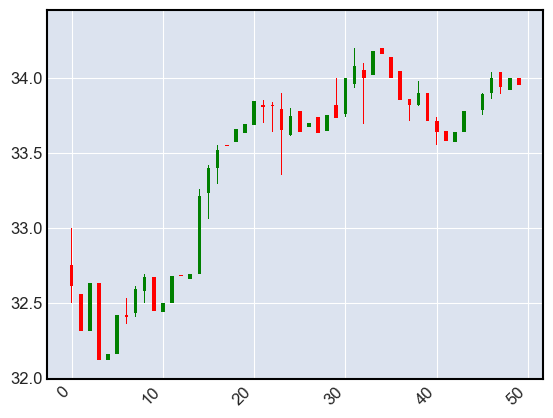

In [43]:
#create figure
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down df
up = df1[df1.ClosePrice >= df1.OpenPrice]
down = df1[df1.ClosePrice < df1.OpenPrice]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up df
plt.bar(up.index, up.ClosePrice - up.OpenPrice, width, bottom = up.OpenPrice, color = col1)
plt.bar(up.index, up.High - up.ClosePrice, width2, bottom = up.ClosePrice, color = col1)
plt.bar(up.index, up.Low - up.OpenPrice, width2, bottom = up.OpenPrice, color = col1)

#plot down df
plt.bar(down.index, down.ClosePrice - down.OpenPrice ,width,bottom = down.OpenPrice, color = col2)
plt.bar(down.index, down.High - down.OpenPrice, width2, bottom = down.OpenPrice, color = col2)
plt.bar(down.index, down.Low - down.ClosePrice, width2, bottom = down.ClosePrice, color = col2)

#rotate x-axis tick labels
plt.xticks(rotation = 45, ha = 'right')

#display candlestick chart
plt.show() 

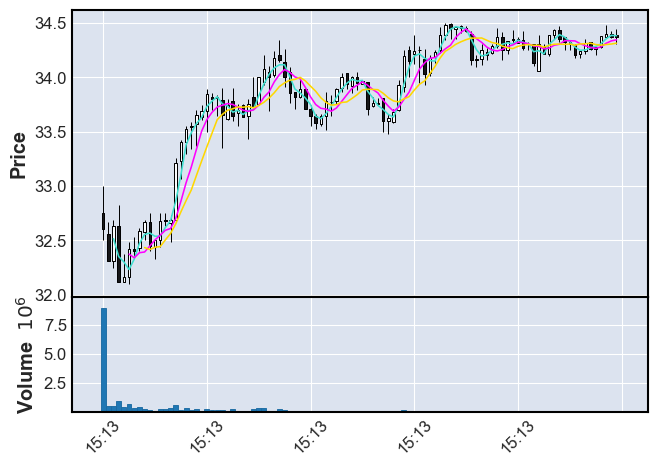

In [44]:
mpf.plot(df2, type='candle', mav = (3,6,9), volume=True)

In [45]:
obj = DB('199.247.18.191','Quantum.EconomicCalendar','sa','Lord_1774')
df = DB.read_sql(QUERY, obj)
df

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2859593263.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql(QUERY, object.get_connection())


,Id,ListingAt,CompanyName,Ticker,Country,CountryCode,Currency,Exchange,IPOValue_Value,IPOValue_Postfix,IPOPrice_Value,IPOPrice_Postfix
0,1,1970-01-01 00:00:00.0000000,Yoshitsu Co Ltd,TKLF,United States,us,USD,NASDAQ,24.0,M,4.00,
1,2,1995-09-14 00:00:00.0000000,Preston North End,PNE,United Kingdom,gb,GBP,London,2.5,M,400.00,
2,3,1995-10-03 00:00:00.0000000,Ask Central,AKCE,United Kingdom,gb,GBP,London,1.2,M,35.00,
3,4,1995-12-15 00:00:00.0000000,Dmatek,DTK,United Kingdom,gb,GBP,London,4.1,M,75.00,
4,5,1996-01-09 00:00:00.0000000,Skyepharma,SKP,United Kingdom,gb,GBP,London,9.9,M,8.00,
...,...,...,...,...,...,...,...,...,...,...,...,...
15779,16753,2024-04-16 00:00:00.0000000,Will Smart Co,175A,Japan,jp,JPY,Tokyo,,,,
15780,16765,2024-04-18 00:00:00.0000000,Ranmarine Technology Inc,RANM,United States,us,USD,NASDAQ,7.9,M,5.50,
15781,16762,2024-04-18 00:00:00.0000000,Zena Tech Inc,ZENA,United States,us,USD,NASDAQ,,,,
15782,16763,2024-04-18 00:00:00.0000000,Centuri Holdings Ltd,CTRI,United States,us,USD,NYSE,260.4,M,,


In [46]:
# Гипотеза 1

In [47]:
data_rate = df.query(f"Ticker == '{name_ticker}'")
data_rate

,Id,ListingAt,CompanyName,Ticker,Country,CountryCode,Currency,Exchange,IPOValue_Value,IPOValue_Postfix,IPOPrice_Value,IPOPrice_Postfix
9440,9442,2019-12-12 00:00:00.0000000,Xp Inc,XP,United States,us,USD,NASDAQ,2.0,B,27.00,


In [48]:
# last брал с последней строки во фрейме

list_diff_ipo_last = []
list_diff_start_last = []
list_size_company = []

for i in files_list:
    try:
        df_ipo = df.query(f"Ticker == '{i}'")
        df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
        path_rate = f"C:/Users/Dmitry/Desktop/percentage from [95; 200]/{i}.parquet"
        df_rates = Rates.read_parquet(path_rate)
        list_size_company.append(Dataframe.test_company(df_ipo.IPOValue_Postfix))
        list_diff_ipo_last.append((float(df_ipo.IPOPrice_Value.values[0]) - 
                                  df_rates['ClosePrice'].iloc[-1:].values[0]) /
                                  df_rates['ClosePrice'].iloc[-1:].values[0] * 100)
        list_diff_start_last.append((df_rates['OpenPrice'].values[0] - 
                                    df_rates['ClosePrice'].iloc[-1:].values[0]) /
                                    df_rates['ClosePrice'].iloc[-1:].values[0] * 100)
    except FileNotFoundError:
        continue
    except:
        list_diff_ipo_last.append('0')
np_array = list(zip(files_list,list_size_company,list_diff_ipo_last,list_diff_start_last))
pending_frame = pd.DataFrame(np_array)
pending_frame.columns = ['Company', 'Size', 'DiffIpoLastPrice_%','DiffStartLastPrice_%']
pending_frame

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipo.IPOPrice_Value = df_ipo.IPOPrice_Value.replace('', '0').astype(float)
C:\Users\Dmitry\AppData\Local\Temp\ipykernel_9260\2068736434.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

,Company,Size,DiffIpoLastPrice_%,DiffStartLastPrice_%
0,A,Small,-76.880394,-80.425400
1,ABCL,Small,286.84719,1079.883957
2,ABNB,Small,-53.035428,0.835698
3,ACI,Small,-24.882626,6.197191
4,ACN,Small,-96.016484,-93.750000
...,...,...,...,...
200,XP,Small,11.15685,171.764708
201,XPEV,Small,76.470588,-49.156851
202,YELP,Small,-100.0,134.899330
203,YNDX,Small,-100.0,1027.608871


In [ ]:
# Гипотеза 2

In [20]:

list_diff_open_price = []
list_IPOValue_company = []

for i in files_list:
    try:
        df_ipo = df.query(f"Ticker == '{i}'")
        path_rate = f"C:/Users/Dmitry/Desktop/percentage from [95; 200]/{i}.parquet"
        df_rates = Rates.read_parquet(path_rate)
        if (len(df_ipo.IPOValue_Value) == 0 or len(df_ipo.IPOValue_Postfix) == 0):
             list_IPOValue_company.append('NaN')
        else:
            list_IPOValue_company.append(f'{df_ipo.IPOValue_Value.values[0]} {df_ipo.IPOValue_Postfix.values[0]}')
        list_diff_open_price.append((df_rates['OpenPrice'].values[0] - 
                                    df_rates['OpenPrice'].iloc[-1:].values[0]) / 
                                    df_rates['OpenPrice'].iloc[-1:].values[0] * 100)
    except FileNotFoundError:
        continue
np_array = list(zip(files_list, list_IPOValue_company,list_diff_open_price))
pending_dataframe = pd.DataFrame(np_array)
pending_dataframe.columns = ['Company', 'IPOValue', 'DiffOpenPrice']
pending_dataframe

,Company,IPOValue,DiffOpenPrice
0,A,1.7 B,-80.425400
1,ABCL,460.0 M,1079.883957
2,ABNB,3.5 B,1.283390
3,ACI,1.1 B,6.197191
4,ACN,1.4 B,-93.750000
...,...,...,...
201,XPEV,1.3 B,170.808923
202,YELP,100.1 M,-49.156851
203,YNDX,1.1 B,134.899330
204,ZH,522.5 M,1027.608871


In [ ]:
# Гипотеза 3
# Трудно реализуема, нет данных о континентах